# <font size="6"> Housing Data Exploratory Data Analysis (EDA): </font>



## Data Pre-Processing and Exploration

### Purpose

In this notebook, I'll walk through some exploratory data analysis (EDA) done on a housing prices dataset taken from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). This dataset will ultimately output a scrubbed .csv dataset that will feed into my separate notebook for automated machine learning regression analysis. For the other notebook to run, it is required that NA values (and outliers as appropriate) are removed from this dataset and variables of interest are properly formatted.
The focus of this notebook was to illustrate basic EDA techniques and the minimum 'data cleaning' requirements for this dataset to input into my automated regression analysis program.

First, we'll import some libraries to read and scrub our csv dataset.

### Raw data snapshot

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir("C:\\Users\\oshapira\\Desktop\\Analytics\\Automated_ML_Regression\\raw_data\\housesalesprediction")
##import dataset and create data frame
df_raw = pd.read_csv('kc_house_data.csv')


Then, we'll look at the dataset dimensions, and a snapshot of the data and columns

In [3]:
pd.set_option('display.max_columns', 100) ##set option to display all columns
df_dimensions = print('Dataset dimensions' + str(df_raw.shape))
df_dimensions

df_raw.head(5)


Dataset dimensions(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Next, we'll create a copy of the dataframe to be used for scrubbing and analysis

In [5]:
df = df_raw.copy()

### Categorical Variables

Since 'waterfront' and 'view' are categorical variables, I wanted to view the unique values. 

In [6]:
df.waterfront.unique()

array([0, 1], dtype=int64)

Since view has ordinal values of 0-4, I chose to leave these as numeric.

In [7]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

Then I wanted to visualize the distribution.

C:\Users\oshapira\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


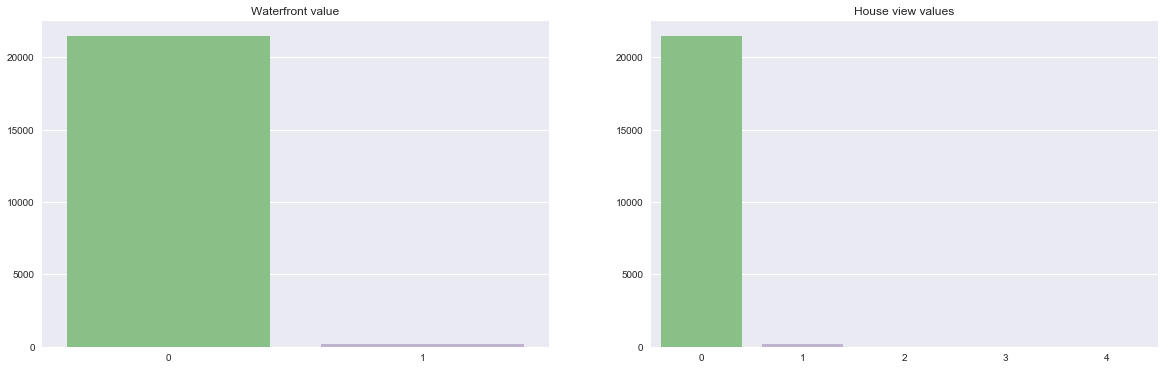

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

h, axes = plt.subplots (1,2, figsize=(20,6))

WF =df.waterfront.unique()
view_score =df.view.unique()


waterfront = []
for i in range(0, len(WF)):
    val = WF[i]
    values = (df.waterfront == val).sum()
    waterfront.append(values)

house_view = []
for i in range(0, len(view_score)):
    val = view_score[i]
    values = (df.waterfront == val).sum()
    house_view.append(values)


vis1= sns.barplot(WF,np.array(waterfront),palette='Accent',ax=axes[0])
vis2= sns.barplot(view_score,np.array(house_view),palette='Accent',ax=axes[1])


axes[0].set_title('Waterfront value')
axes[1].set_title('House view values')
plt.ioff()



Even the house view values were ordinal, there was a small proportion that had a view score > 0. Therefore, I mapped this to be a categorical variable of Yes/No for whether the house had a view. I did the same thing for 'waterfront' values and the yr_renovated column (I was more interested in yr_built as an indicator of how modern the house was).

In [9]:
df['renovation'] = np.where(df.yr_renovated > 0, 'Yes', 'No')
df['waterfront'] = np.where(df.waterfront == 1, 'Yes', 'No')
df['view'] = np.where(df.view > 0, 'Yes', 'No')


### Filter dataset

Next, I filtered on the columns that I felt were relevant to my analysis.

In [10]:
columns_to_keep_eda = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovation', 'lat', 'long', 'yr_built']
df_eda = df.filter(items = columns_to_keep_eda)
df_eda.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovation,lat,long,yr_built
0,221900.0,3,1.00,1180,5650,1.0,No,No,3,7,No,47.5112,-122.257,1955
1,538000.0,3,2.25,2570,7242,2.0,No,No,3,7,Yes,47.7210,-122.319,1951
2,180000.0,2,1.00,770,10000,1.0,No,No,3,6,No,47.7379,-122.233,1933
3,604000.0,4,3.00,1960,5000,1.0,No,No,5,7,No,47.5208,-122.393,1965
4,510000.0,3,2.00,1680,8080,1.0,No,No,3,8,No,47.6168,-122.045,1987
5,1225000.0,4,4.50,5420,101930,1.0,No,No,3,11,No,47.6561,-122.005,2001
6,257500.0,3,2.25,1715,6819,2.0,No,No,3,7,No,47.3097,-122.327,1995
7,291850.0,3,1.50,1060,9711,1.0,No,No,3,7,No,47.4095,-122.315,1963
8,229500.0,3,1.00,1780,7470,1.0,No,No,3,7,No,47.5123,-122.337,1960
9,323000.0,3,2.50,1890,6560,2.0,No,No,3,7,No,47.3684,-122.031,2003


Next, I checked the data type format of each selected variable

In [11]:
df_eda.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront      object
view            object
condition        int64
grade            int64
renovation      object
lat            float64
long           float64
yr_built         int64
dtype: object

Then, I checked whether the dataset had any 'NA' values that needed to be removed or imputed. Forutnately, there were none

In [12]:
df_eda[df_eda.isna().any(axis=1)]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovation,lat,long,yr_built


### Analyze/visualize data distribution

I printed descriptive statistics on each numeric column to see whether there were any outlier values that stood out.

In [13]:
print(df_eda.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors     condition         grade           lat          long  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      3.409430      7.656873     47.560053   -122.213896   
std        0.539989      0.650743      1.175459    

I also output a boxplot and histrogram matrix to visualize the distributions.

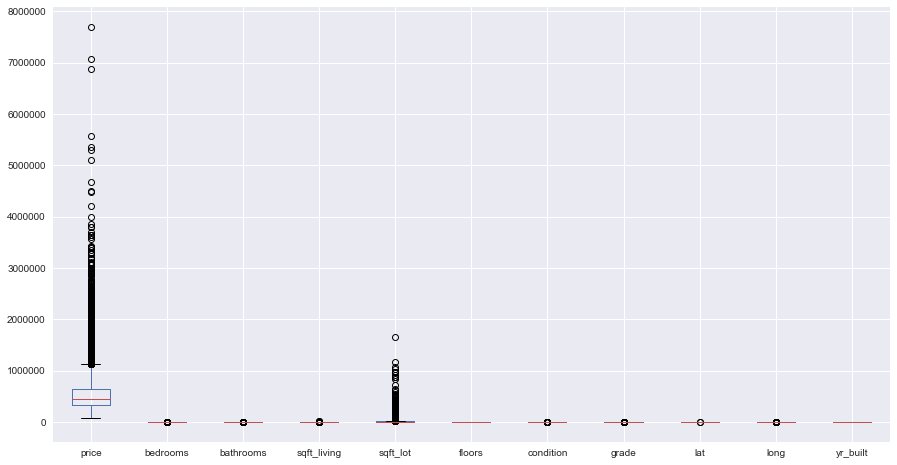

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15, 8))
df_eda.boxplot()

Remove outliers

<Figure size 1800x1080 with 0 Axes>

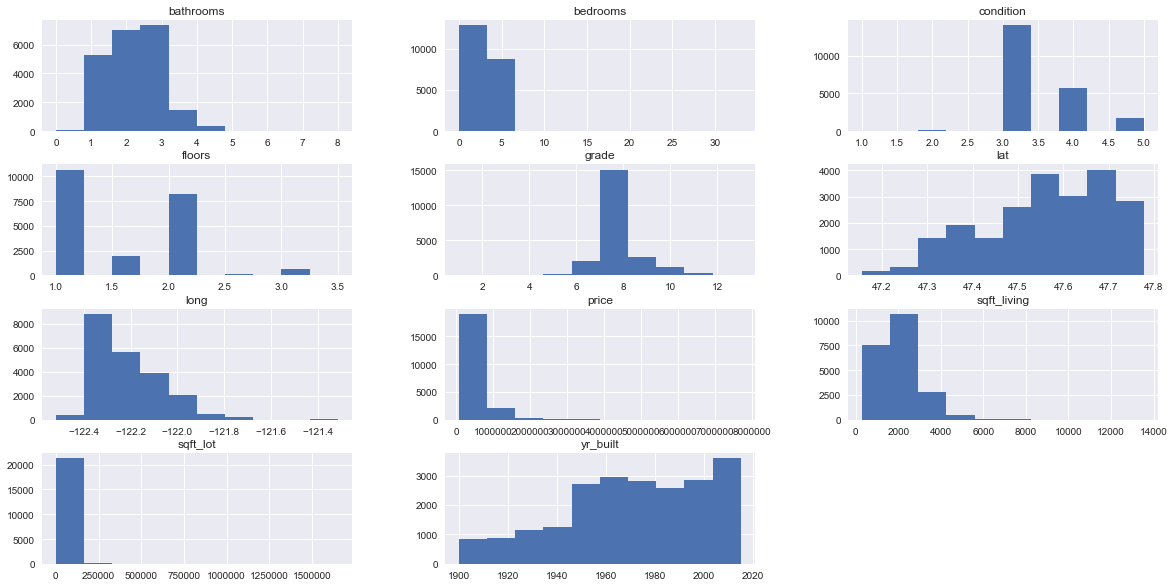

In [15]:
%matplotlib inline
plt.figure(figsize = (25, 15))
df_eda.hist()
plt.gcf().set_size_inches(20, 10)
plt.show()

### Look at outliers

I took a closer look at house price and sqft_living, which did seem to have some outlier values. I filtered on records where price was > $2M and sqft_living was > 10,000 sqft, and sorted results by price. Another method I could have used was to look at houses with prices/sqft_living values that were 3 standard deviations from the median.

In [16]:
outliers = df_eda[(df_eda['price'] > 2000000) | (df_eda['sqft_living'] > 10000)]
outliers = outliers.sort_values(by=['price'], ascending = False)
print("There are " + str(len(outliers)) + " outlier records")
outliers.head(20)

There are 198 outlier records


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,renovation,lat,long,yr_built
7252,7700000.0,6,8.00,12050,27600,2.5,No,Yes,4,13,Yes,47.6298,-122.323,1910
3914,7062500.0,5,4.50,10040,37325,2.0,Yes,Yes,3,11,Yes,47.6500,-122.214,1940
9254,6885000.0,6,7.75,9890,31374,2.0,No,Yes,3,13,No,47.6305,-122.240,2001
4411,5570000.0,5,5.75,9200,35069,2.0,No,No,3,13,No,47.6289,-122.233,2001
1448,5350000.0,5,5.00,8000,23985,2.0,No,Yes,3,12,No,47.6232,-122.220,2009
1315,5300000.0,6,6.00,7390,24829,2.0,Yes,Yes,4,12,No,47.5631,-122.210,1991
1164,5110800.0,5,5.25,8010,45517,2.0,Yes,Yes,3,12,No,47.6767,-122.211,1999
8092,4668000.0,5,6.75,9640,13068,1.0,Yes,Yes,3,12,Yes,47.5570,-122.210,1983
2626,4500000.0,5,5.50,6640,40014,2.0,Yes,Yes,3,12,No,47.7493,-122.280,2004
8638,4489000.0,4,3.00,6430,27517,2.0,No,No,3,12,No,47.6208,-122.219,2001


My goal with assessing outliers was to detect potential datapoints that seemed like errors. Judging by the variable values related to expensive homes, it seemed like the outlier datapoints were at least accurate. I chose to leave in these expensive homes with large square-footage.

### Scatterplot matrix and variable correlation

In order to evaluate correlation of variables to house price and to each other (for collinearity), I created a scatterplot matrix. The plot diagonal shows the distribution of the variable.

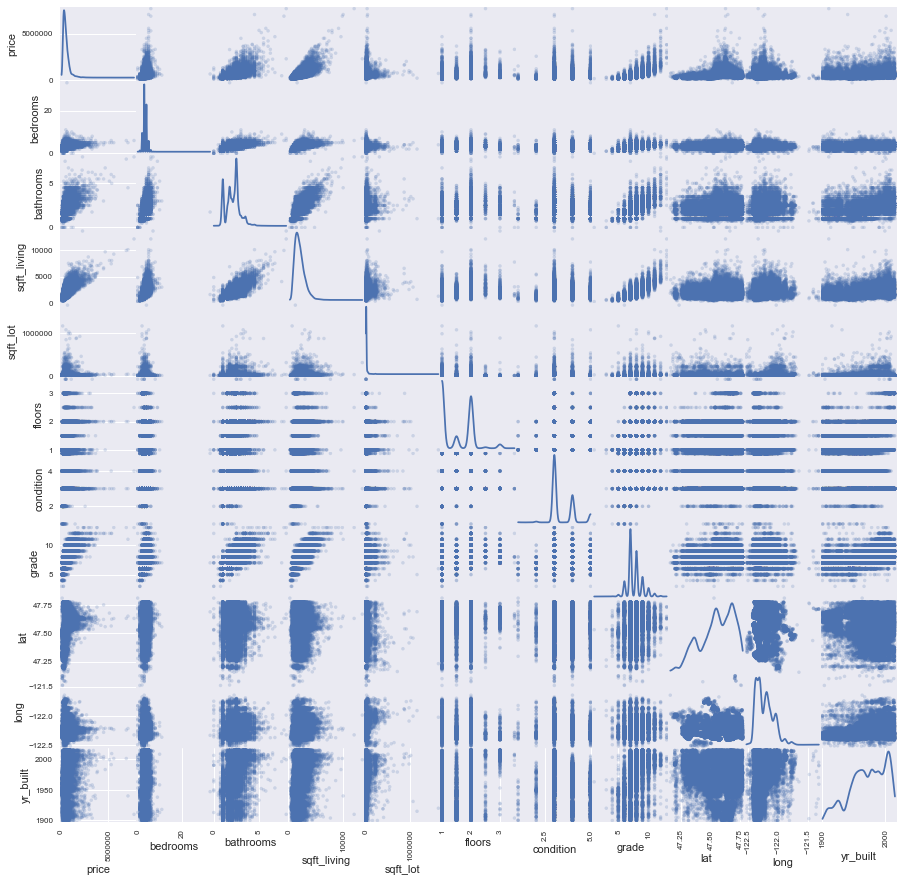

In [17]:
from pandas.plotting import scatter_matrix


def scatter_matrix_plot(variables):
    scatter_matrix(df_eda, alpha=0.2, figsize=(15,15), diagonal='kde')
 
    return plt.show()

scatter_matrix_plot(columns_to_keep_eda)

Unfortunately, this plot was very large and hard to interpret. Therefore, I printed the linear correlations of each numeric variable relating to price. As seen, sqft_living has the highest correlation. If you squint and look at the scatterplot matrix, you can see this positive correlation.

In [18]:
def correlations(variables):
#     filtered_df = Data_Filter_Class(variables)
#     filtered_df = filtered_df.filter_data()
    print("Correlations with Price")
    corr = df_eda.corr()
    corr.sort_values('price', ascending = False, inplace = True)
    print(corr['price'])
    
correlations(columns_to_keep_eda)

Correlations with Price
price          1.000000
sqft_living    0.702035
grade          0.667434
bathrooms      0.525138
bedrooms       0.308350
lat            0.307003
floors         0.256794
sqft_lot       0.089661
yr_built       0.054012
condition      0.036362
long           0.021626
Name: price, dtype: float64


### Export to CSV

Now that my EDA is complete, I output the final 'scrubbed' dataset as a .csv file. You can look at my other notebook for how this data will get input into my regression analysis.

In [19]:
df_eda.to_csv(r'C:\\Users\\oshapira\\Desktop\\Analytics\\Automated_ML_Regression\\scrubbed_data\\scrubbed_data.csv')